In [2]:
import json

import pandas as pd

from datetime import datetime, timedelta

import matplotlib.pyplot as plt  # to make plots
import matplotlib.dates as mdates  # to use ConciseDateFormatter

In [18]:
pilot_data_root = "Dataset/dataset/"  # change this to your own path

**Read data csv files**


In [32]:
personal_data_path = "personal_data.csv"
participants_manifest_path = pilot_data_root + "participants.tsv"

In [36]:
personal_data_df = pd.read_csv(personal_data_path)
personal_data_df.rename(columns={'person_id': 'participant_id', 'value_as_number_height': 'height_cm', 'value_as_number_weight': 'weight_kg'}, inplace=True)
print(personal_data_df.head())





   participant_id  height_cm  weight_kg
0            1001      162.0       57.3
1            1002      175.2       94.1
2            1003      160.7       73.2
3            1004      174.5       76.8
4            1005      173.0       79.6


In [39]:

df_participant = pd.read_csv(participants_manifest_path, sep='\t')
print(df_participant.nunique())  # number of unique participants
df_participant.head()

participant_id               1067
clinical_site                   3
study_group                     4
age                            48
study_visit_date              245
recommended_split               3
cardiac_ecg                     2
clinical_data                   1
environment                     2
retinal_flio                    2
retinal_oct                     2
retinal_octa                    2
retinal_photography             2
wearable_activity_monitor       2
wearable_blood_glucose          2
dtype: int64


,participant_id,clinical_site,study_group,age,study_visit_date,recommended_split,cardiac_ecg,clinical_data,environment,retinal_flio,retinal_oct,retinal_octa,retinal_photography,wearable_activity_monitor,wearable_blood_glucose
0,1001,UW,pre_diabetes_lifestyle_controlled,69,2023-07-27,train,True,True,True,True,True,True,True,False,True
1,1002,UW,healthy,69,2023-08-01,train,True,True,True,True,True,True,True,False,True
2,1003,UW,oral_medication_and_or_non_insulin_injectable_...,82,2023-08-02,train,True,True,True,True,True,True,True,False,True
3,1004,UW,oral_medication_and_or_non_insulin_injectable_...,61,2023-08-08,val,True,True,True,True,True,True,True,False,True
4,1005,UW,insulin_dependent,58,2023-08-08,val,True,True,True,True,True,True,True,False,True


In [43]:
height_stats = (
    df_participant
    .merge(personal_data_df, on='participant_id')  # Merge on 'participant_id' to combine data
    .groupby('study_group')['height_cm']  # Group by 'study_group' and select columns
    .agg(['mean', 'min', 'max'])
)

weight_stats = (
    df_participant
    .merge(personal_data_df, on='participant_id')  # Merge on 'participant_id' to combine data
    .groupby('study_group')['weight_kg']  # Group by 'study_group' and select columns
    .agg(['mean', 'min', 'max'])
)

# Print the results
print('Height and weight data:')
print(height_stats)
print('-' * 40)
print(weight_stats)

Height and weight data:
                                                          mean    min    max
study_group                                                                 
healthy                                             167.060000  145.0  193.8
insulin_dependent                                   167.148462  147.5  192.5
oral_medication_and_or_non_insulin_injectable_m...  166.833437  113.4  195.6
pre_diabetes_lifestyle_controlled                   165.582273  137.0  193.0
----------------------------------------
                                                         mean   min    max
study_group                                                               
healthy                                             79.974528  39.4  215.8
insulin_dependent                                   96.156538  47.2  190.8
oral_medication_and_or_non_insulin_injectable_m...  88.808824  52.2  163.7
pre_diabetes_lifestyle_controlled                   83.204917  42.7  165.8


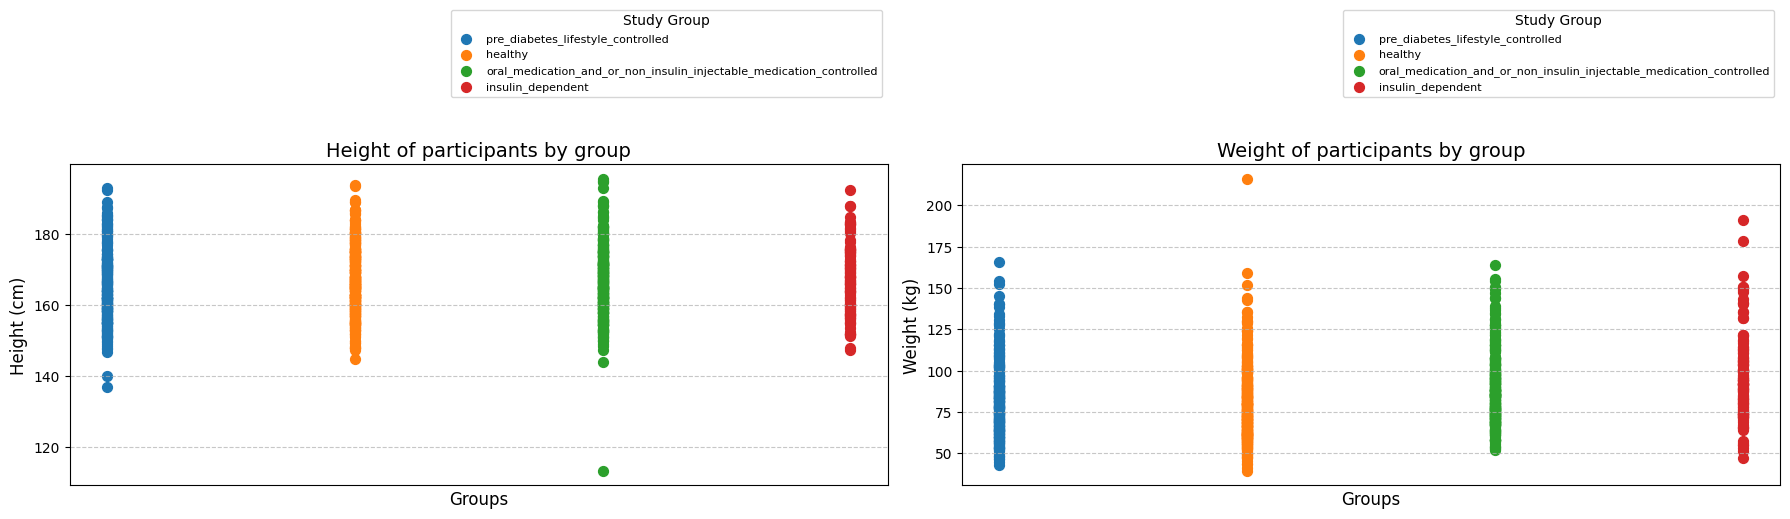

In [44]:
merged_data = personal_data_df.merge(
    df_participant[['participant_id', 'study_group']],
    on='participant_id'
)

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatterplot for height
for group in merged_data['study_group'].unique():
  group_data = merged_data[merged_data['study_group'] == group]
  ax[0].scatter(
    group_data['study_group'], 
    group_data['height_cm'],
    label=group, 
    s=50  # Marker size
  )
ax[0].set_title('Height of participants by group', fontsize=14)
ax[0].set_xlabel('Groups', fontsize=12)
ax[0].set_ylabel('Height (cm)', fontsize=12)
ax[0].set_xticks([])
ax[0].legend(title='Study Group', fontsize=8, bbox_to_anchor=(1, 1.5), loc='upper right')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Scatterplot for weight
for group in merged_data['study_group'].unique():
  group_data = merged_data[merged_data['study_group'] == group]
  ax[1].scatter(
    group_data['study_group'], 
    group_data['weight_kg'],
    label=group, 
    s=50  # Marker size
  )
ax[1].set_title('Weight of participants by group', fontsize=14)
ax[1].set_xlabel('Groups', fontsize=12)
ax[1].set_ylabel('Weight (kg)', fontsize=12)
ax[1].set_xticks([])
ax[1].legend(title='Study Group', fontsize=8, bbox_to_anchor=(1, 1.5), loc='upper right')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()